In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"D:\Machine Learning\Projects\Real_estate\Dataset\Clean_Data.csv",index_col=0)           
df.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [3]:
## Creating dummies for location column
dummies=pd.get_dummies(df.location)
dummies.drop(['other'],axis=1,inplace=True)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df1=pd.concat([df,dummies],axis=1)
df1.head(5)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df1.drop(["location"],axis=1,inplace=True)

In [6]:
# Standardize column names by removing spaces and converting to lowercase
df1.columns = df1.columns.str.strip().str.replace(' ', '_').str.lower()

### Test Train Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df1.drop(["price"],axis=1)
y=df1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5873, 244), (5873,), (1469, 244), (1469,))

In [10]:
### Regression Model
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

0.8507424595139835

In [11]:
lg_ypred=lg.predict(X_train)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rfg=RandomForestRegressor()
rfg.fit(X_train,y_train)
rfg.score(X_test,y_test)

0.8028533220289977

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

def perform_regression_with_hyperparameter_tuning(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a dictionary to store the models and their corresponding hyperparameters
    models = {
        "Linear Regression": (LinearRegression(), {'fit_intercept': [True, False]}),
        "Ridge": (Ridge(), {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}),
        "Lasso": (Lasso(), {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}),
#         "Support Vector Regression": (SVR(), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}),
        "Random Forest Regression": (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
        "Gradient Boosting Regression": (GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}),
        "XGBoost Regression": (XGBRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]})
    }

    # Initialize an empty DataFrame to store results
    results_df = pd.DataFrame(columns=['Model', 'Best_Score', 'Best_Params'])

    # Iterate over each model, perform GridSearchCV for hyperparameter tuning, and store the results in the DataFrame
    for model_name, (model, params) in models.items():
        grid_search = GridSearchCV(model, params, scoring='r2', cv=5)
        grid_search.fit(X_train, y_train)
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        results_df = results_df.append({'Model': model_name, 'Best_Score': best_score, 'Best_Params': best_params}, ignore_index=True)

    # Sort the DataFrame by the best score in descending order
    results_df = results_df.sort_values(by='Best_Score', ascending=False)

    return results_df

# Example usage:
# Assuming you have X and y as your input data
# result_dataframe = perform_regression_with_hyperparameter_tuning(X, y)
# print(result_dataframe)


In [15]:
result_dataframe = perform_regression_with_hyperparameter_tuning(X, y)
result_dataframe

,Model,Best_Score,Best_Params
1,Ridge,0.836676,{'alpha': 1.0}
0,Linear Regression,0.834383,{'fit_intercept': False}
2,Lasso,0.830169,{'alpha': 0.01}
4,Gradient Boosting Regression,0.822566,"{'learning_rate': 0.5, 'n_estimators': 200}"
3,Random Forest Regression,0.788013,"{'max_depth': 20, 'n_estimators': 50}"
5,XGBoost Regression,0.743306,"{'learning_rate': 0.5, 'n_estimators': 200}"


In [16]:
print("Best model is {0} with hyperparameters {1}".format(result_dataframe.Model.iloc[0],result_dataframe.Best_Params.iloc[0]))

Best model is Ridge with hyperparameters {'alpha': 1.0}


In [17]:
# Define the model dictionary that maps model names to their corresponding functions
model_dict = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Support Vector Regression": SVR(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "XGBoost Regression": XGBRegressor()
}

In [18]:
# Get the best model name from the results DataFrame
best_model_name = result_dataframe.iloc[0]['Model']

# Retrieve the best model function from the model dictionary
best_model_function = model_dict[best_model_name]

# Get the best hyperparameters for the best model from the results DataFrame
best_model_params = result_dataframe.iloc[0]['Best_Params']

# Initialize the best model with the hyperparameters
best_model = best_model_function.set_params(**best_model_params)

# Train the best model on the entire training dataset
bestmodel=best_model.fit(X_train, y_train)

# Now, you can use the best_model for making predictions on new data or evaluating its performance.
# For example:
y_pred = bestmodel.predict(X_test)
y_pred = pd.Series(y_pred, index=y_test.index)

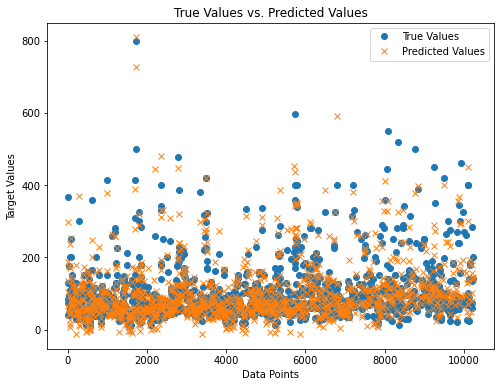

In [19]:
# Create a line plot between y_test and y_pred
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='True Values', marker='o', linestyle='None')
plt.plot(y_pred, label='Predicted Values', marker='x', linestyle='None')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('True Values vs. Predicted Values')
plt.legend()
plt.show()

In [25]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [21]:
#Save X_train columns as json file
import json
columns = {
    'data_columns' : list(X.columns)
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [22]:
# import numpy as np
# def predict_price(location,sqft,bath,bhk):    
#     loc_index = np.where(__data_columns==location)[0][0]

#     x = np.zeros(len(X.columns))
#     x[0] = sqft
#     x[1] = bath
#     x[2] = bhk
#     if loc_index >= 0:
#         x[loc_index] = 1

#     return bestmodel.predict([x])[0]

In [3]:
import json
with open("columns.json","r") as f:
    __data_columns=json.load(f)['data_columns']
    
__data_columns

['total_sqft',
 'bath',
 'bhk',
 'devarachikkanahalli',
 '1st_block_jayanagar',
 '1st_phase_jp_nagar',
 '2nd_phase_judicial_layout',
 '2nd_stage_nagarbhavi',
 '5th_block_hbr_layout',
 '5th_phase_jp_nagar',
 '6th_phase_jp_nagar',
 '7th_phase_jp_nagar',
 '8th_phase_jp_nagar',
 '9th_phase_jp_nagar',
 'aecs_layout',
 'abbigere',
 'akshaya_nagar',
 'ambalipura',
 'ambedkar_nagar',
 'amruthahalli',
 'anandapura',
 'ananth_nagar',
 'anekal',
 'anjanapura',
 'ardendale',
 'arekere',
 'attibele',
 'beml_layout',
 'btm_2nd_stage',
 'btm_layout',
 'babusapalaya',
 'badavala_nagar',
 'balagere',
 'banashankari',
 'banashankari_stage_ii',
 'banashankari_stage_iii',
 'banashankari_stage_v',
 'banashankari_stage_vi',
 'banaswadi',
 'banjara_layout',
 'bannerghatta',
 'bannerghatta_road',
 'basavangudi',
 'basaveshwara_nagar',
 'battarahalli',
 'begur',
 'begur_road',
 'bellandur',
 'benson_town',
 'bharathi_nagar',
 'bhoganhalli',
 'billekahalli',
 'binny_pete',
 'bisuvanahalli',
 'bommanahalli',
 'b

In [27]:
# import json
# columns_new = {
#     'data_columns' : [list(X.columns)]}
# with open("XCols.json","w")as f:
#     json.dump(columns_new ,f)
# with open("columns.json","r") as f:
#     __data_columns=json.load(f)['data_columns']
    
  

##insead of just values passing df with cols  to predict

def predict_price_new(location,sqft,bath,bhk):
    col_list=__data_columns
    data_dict = dict.fromkeys(col_list, 0)
    predict_df = pd.DataFrame([data_dict])
    predict_df.total_sqft=sqft
    predict_df.bath=bath
    predict_df.bhk=bhk
    
    try :
        predict_df.loc[0,location] = 1
    except:
        print("location Not found")
        
    return bestmodel.predict(predict_df)[0]


predict_price_new('devarachikkanahalli', 1000, 2, 3)

40.82257442170403

In [34]:
col_list=__data_columns
data_dict = dict.fromkeys(col_list, 0)
predict_df = pd.DataFrame([data_dict])
predict_df

,total_sqft,bath,bhk,devarachikkanahalli,1st_block_jayanagar,1st_phase_jp_nagar,2nd_phase_judicial_layout,2nd_stage_nagarbhavi,5th_block_hbr_layout,5th_phase_jp_nagar,...,vijayanagar,vishveshwarya_layout,vishwapriya_layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka_new_town,yelenahalli,yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
__data_columns

['total_sqft',
 'bath',
 'bhk',
 'devarachikkanahalli',
 '1st_block_jayanagar',
 '1st_phase_jp_nagar',
 '2nd_phase_judicial_layout',
 '2nd_stage_nagarbhavi',
 '5th_block_hbr_layout',
 '5th_phase_jp_nagar',
 '6th_phase_jp_nagar',
 '7th_phase_jp_nagar',
 '8th_phase_jp_nagar',
 '9th_phase_jp_nagar',
 'aecs_layout',
 'abbigere',
 'akshaya_nagar',
 'ambalipura',
 'ambedkar_nagar',
 'amruthahalli',
 'anandapura',
 'ananth_nagar',
 'anekal',
 'anjanapura',
 'ardendale',
 'arekere',
 'attibele',
 'beml_layout',
 'btm_2nd_stage',
 'btm_layout',
 'babusapalaya',
 'badavala_nagar',
 'balagere',
 'banashankari',
 'banashankari_stage_ii',
 'banashankari_stage_iii',
 'banashankari_stage_v',
 'banashankari_stage_vi',
 'banaswadi',
 'banjara_layout',
 'bannerghatta',
 'bannerghatta_road',
 'basavangudi',
 'basaveshwara_nagar',
 'battarahalli',
 'begur',
 'begur_road',
 'bellandur',
 'benson_town',
 'bharathi_nagar',
 'bhoganhalli',
 'billekahalli',
 'binny_pete',
 'bisuvanahalli',
 'bommanahalli',
 'b

In [1]:
import pickle

# open a file, where you stored the pickled data
file = open('best_model.pkl', 'rb')

# dump information to that file
loadmodel = pickle.load(file)

# close the file
file.close()


In [7]:
def predict_price_new(location,sqft,bath,bhk):
    col_list=__data_columns
    data_dict = dict.fromkeys(col_list, 0)
    predict_df = pd.DataFrame([data_dict])
    predict_df.total_sqft=sqft
    predict_df.bath=bath
    predict_df.bhk=bhk
    
    try :
        predict_df.loc[0,location] = 1
    except:
        print("location Not found")
        
    return loadmodel.predict(predict_df)[0]


predict_price_new('5th_block_hbr_layout', 1200, 3, 4)

15.802842557319863